# Solution proposal - day 2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1

The file <code>mpg.xlsx</code> contains observations on fuel economy and 6 additional attributes for 398 different car models. The column <code>mpg</code> is a measure of the car's fuel economy, i.e. the number of miles per gallon of petrol.
        
Import the file as a <code>DataFrame</code> and answer the following questions:

1. Which columns in the dataframe are strings?

In [3]:
# load the data
mpg_df = pd.read_excel('mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


In [4]:
# there are two columns that are strings: origin and name
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    object 
 7   name          398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


2. What is the average number of miles per gallon of the car models in the data?

In [5]:
# print full descriptives...
mpg_df.describe()

,mpg,cylinders,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# ...or calculate only the average of mpg
mpg_df['mpg'].mean()

23.514572864321615

3. What are the unique number of cylinders observed in the data?

In [7]:
# there are 5 unique number of cylinders: 3, 4, 5, 6, 8
mpg_df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

4. How many of the car models in the data were from Europe?

In [8]:
# 70 of the car models were from Europe
mpg_df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

5. What is the correlation between cars' fuel economy and horsepower?

In [9]:
# print full correlation table...
mpg_df.corr()

,mpg,cylinders,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.842983,0.896017,-0.505419,-0.348746
horsepower,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.416361,-0.306564,0.288137,1.000000


In [10]:
# ...or print correlation between two pandas series only
mpg_df['mpg'].corr(mpg_df['horsepower'])

-0.7784267838977759

6. Are there any missing observations in the data?

In [11]:
# 6 car models lack observation on horsepower
mpg_df.isna().sum()

mpg             0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Part 2

Again, import the file <code>mpg.xlsx</code> as a <code>DataFrame</code> and explore the data visually.

Create a figure with 2 x 2 subplots:

- In the first row, first column, show a histogram of <code>mpg</code>.


- In the first row, second column, show a scatter plot of <code>mpg</code> and <code>horsepower</code>.


- In the second row, first column, show a scatter plot of <code>mpg</code> and <code>weight</code>.


- In the second row, second column, show a scatter plot of <code>mpg</code> and <code>acceleration</code>.


Style the plots to make them look nice and save the figure as `mpg_plot.png`.

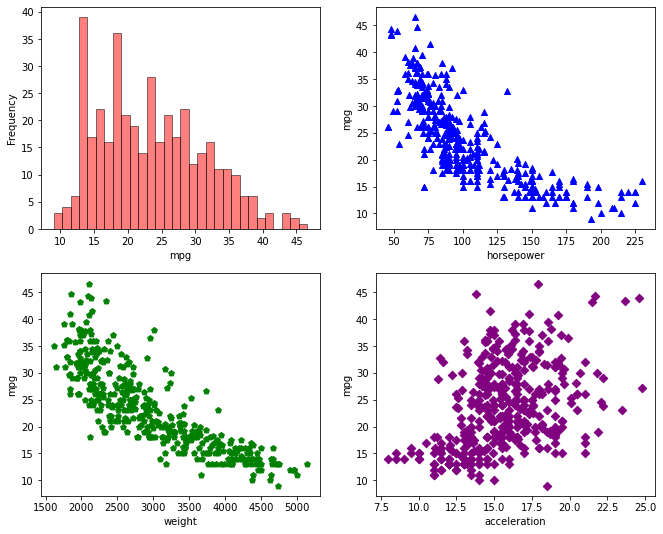

In [27]:
fig, ax = plt.subplots(nrows = 2,         # 2 rows
                       ncols = 2,         # 2 columns
                       figsize = (11, 9))

# histogram
ax[0, 0].hist(mpg_df['mpg'], 
              bins = 30, 
              color = 'red',
              edgecolor = 'black',
              alpha = 0.5)
ax[0, 0].set_xlabel('mpg')
ax[0, 0].set_ylabel('Frequency')

# scatter plot 1
ax[0, 1].scatter(mpg_df['horsepower'],
                 mpg_df['mpg'],
                 color = 'blue',
                 marker = '^')
ax[0, 1].set_xlabel('horsepower')
ax[0, 1].set_ylabel('mpg')

# scatter plot 2
ax[1, 0].scatter(mpg_df['weight'],
                 mpg_df['mpg'],
                 color = 'green',
                 marker = 'p')
ax[1, 0].set_xlabel('weight')
ax[1, 0].set_ylabel('mpg')

# scatter plot 3
ax[1, 1].scatter(mpg_df['acceleration'],
                 mpg_df['mpg'], 
                 color = 'purple',
                 marker = 'D')
ax[1, 1].set_xlabel('acceleration')
ax[1, 1].set_ylabel('mpg')

plt.savefig('mpg_plot.png', dpi = 300)